In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Train_Data = pd.read_csv('train.csv')

In [3]:
Train_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Train_Data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [5]:
Train_Data = Train_Data.drop(['Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],axis=1)

In [6]:
Train_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,250000


In [7]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
Id             1460 non-null int64
MSSubClass     1460 non-null int64
MSZoning       1460 non-null object
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
Street         1460 non-null object
Alley          91 non-null object
LotShape       1460 non-null object
LandContour    1460 non-null object
Utilities      1460 non-null object
LotConfig      1460 non-null object
LandSlope      1460 non-null object
SalePrice      1460 non-null int64
dtypes: float64(1), int64(4), object(8)
memory usage: 148.4+ KB


In [8]:
Train_Data.describe()

,Id,MSSubClass,LotFrontage,LotArea,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,755000.000000


In [9]:
Train_Data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope
count,1460,1460,91,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl
freq,1151,1454,50,925,1311,1459,1052,1382


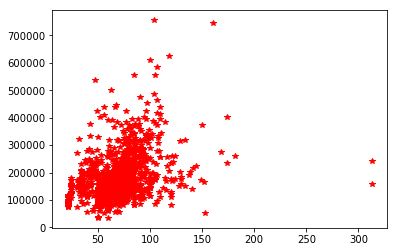

In [10]:
plt.plot(Train_Data.LotFrontage,Train_Data.SalePrice,'*r')

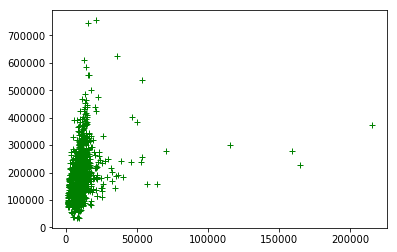

In [11]:
plt.plot(Train_Data.LotArea,Train_Data.SalePrice,'+g')

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
Scaler = MinMaxScaler()

In [14]:
cols_to_normalize = ['LotFrontage','LotArea']

In [15]:
Train_Data.dropna(subset=cols_to_normalize,inplace=True)

In [16]:
Train_Data = Train_Data.drop('Alley',axis=1)

In [17]:
new_value = Scaler.fit_transform(Train_Data[cols_to_normalize])

In [18]:
Train_Data[cols_to_normalize] = new_value

In [19]:
Train_Data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,SalePrice
0,1,60,RL,0.150685,0.033420,Pave,Reg,Lvl,AllPub,Inside,Gtl,208500
1,2,20,RL,0.202055,0.038795,Pave,Reg,Lvl,AllPub,FR2,Gtl,181500
2,3,60,RL,0.160959,0.046507,Pave,IR1,Lvl,AllPub,Inside,Gtl,223500
3,4,70,RL,0.133562,0.038561,Pave,IR1,Lvl,AllPub,Corner,Gtl,140000
4,5,60,RL,0.215753,0.060576,Pave,IR1,Lvl,AllPub,FR2,Gtl,250000


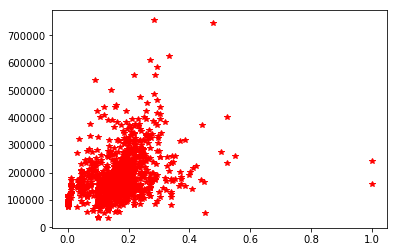

In [20]:
plt.plot(Train_Data.LotFrontage,Train_Data.SalePrice,'*r')

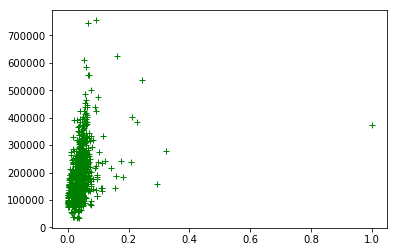

In [21]:
plt.plot(Train_Data.LotArea,Train_Data.SalePrice,'+g')

In [22]:

MSSubClssMap = {60:1,20:2,70:3,50:4,190:5,45:6,90:7,120:8,30:9,80:10,160:11,75:12,180:13,40:14,85:15}

Train_Data.MSSubClass = Train_Data.MSSubClass.map(MSSubClssMap)
Train_Data.MSSubClass.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [23]:
X = Train_Data.drop(['Id','SalePrice','Utilities'],axis=1)
Y = Train_Data['SalePrice']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [26]:
X.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope'], dtype=object)

In [27]:
LotArea = tf.feature_column.numeric_column('LotArea')
LotFrontage = tf.feature_column.numeric_column('LotFrontage')
MSSubClass = tf.feature_column.numeric_column('MSSubClass')

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 9 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null object
LotFrontage    1201 non-null float64
LotArea        1201 non-null float64
Street         1201 non-null object
LotShape       1201 non-null object
LandContour    1201 non-null object
LotConfig      1201 non-null object
LandSlope      1201 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 133.8+ KB


In [29]:
MSZoning = tf.feature_column.categorical_column_with_hash_bucket('MSZoning',5)
Street = tf.feature_column.categorical_column_with_hash_bucket('Street',2)
LotShape = tf.feature_column.categorical_column_with_hash_bucket('LotShape',4)
LandContour = tf.feature_column.categorical_column_with_hash_bucket('LandContour',4)
LotConfig = tf.feature_column.categorical_column_with_hash_bucket('LotConfig',5)
LandSlope = tf.feature_column.categorical_column_with_hash_bucket('LandSlope',3)

In [30]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope
0,1,RL,0.150685,0.033420,Pave,Reg,Lvl,Inside,Gtl
1,2,RL,0.202055,0.038795,Pave,Reg,Lvl,FR2,Gtl
2,1,RL,0.160959,0.046507,Pave,IR1,Lvl,Inside,Gtl
3,3,RL,0.133562,0.038561,Pave,IR1,Lvl,Corner,Gtl
4,1,RL,0.215753,0.060576,Pave,IR1,Lvl,FR2,Gtl


In [31]:
feature_cols = [LotArea,LotFrontage,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope]

In [32]:
model = tf.estimator.LinearRegressor(feature_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': '/var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpizdozl3r'}


In [33]:
train_input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=128,num_epochs=1000,shuffle=True)
test_input_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=128,num_epochs=1000,shuffle=False)

In [34]:
model.train(train_input_func,steps=2000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpizdozl3r/model.ckpt.
INFO:tensorflow:loss = 5.00474e+12, step = 1
INFO:tensorflow:global_step/sec: 192.433
INFO:tensorflow:loss = 4.50755e+12, step = 101 (0.521 sec)
INFO:tensorflow:global_step/sec: 216.438
INFO:tensorflow:loss = 4.858e+12, step = 201 (0.462 sec)
INFO:tensorflow:global_step/sec: 216.746
INFO:tensorflow:loss = 4.95919e+12, step = 301 (0.461 sec)
INFO:tensorflow:global_step/sec: 240.513
INFO:tensorflow:loss = 5.82752e+12, step = 401 (0.416 sec)
INFO:tensorflow:global_step/sec: 240.861
INFO:tensorflow:loss = 4.70698e+12, step = 501 (0.415 sec)
INFO:tensorflow:global_step/sec: 242.483
INFO:tensorflow:loss = 4.6496e+12, step = 601 (0.412 sec)
INFO:tensorflow:global_step/sec: 241.861
INFO:tensorflow:loss = 5.24162e+12, step = 701 (0.413 sec)
INFO:tensorflow:global_step/sec: 243.09
INFO:tensorflow:loss = 5.14364e+12, step = 801 (0.411 s

In [35]:
accuracy = model.evaluate(test_input_func,steps=2000)

INFO:tensorflow:Starting evaluation at 2018-06-20-06:22:38
INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmpizdozl3r/model.ckpt-2000
INFO:tensorflow:Evaluation [1/2000]
INFO:tensorflow:Evaluation [2/2000]
INFO:tensorflow:Evaluation [3/2000]
INFO:tensorflow:Evaluation [4/2000]
INFO:tensorflow:Evaluation [5/2000]
INFO:tensorflow:Evaluation [6/2000]
INFO:tensorflow:Evaluation [7/2000]
INFO:tensorflow:Evaluation [8/2000]
INFO:tensorflow:Evaluation [9/2000]
INFO:tensorflow:Evaluation [10/2000]
INFO:tensorflow:Evaluation [11/2000]
INFO:tensorflow:Evaluation [12/2000]
INFO:tensorflow:Evaluation [13/2000]
INFO:tensorflow:Evaluation [14/2000]
INFO:tensorflow:Evaluation [15/2000]
INFO:tensorflow:Evaluation [16/2000]
INFO:tensorflow:Evaluation [17/2000]
INFO:tensorflow:Evaluation [18/2000]
INFO:tensorflow:Evaluation [19/2000]
INFO:tensorflow:Evaluation [20/2000]
INFO:tensorflow:Evaluation [21/2000]
INFO:tensorflow:Evaluation [22/2000]
INFO:tensorflow:E

INFO:tensorflow:Evaluation [215/2000]
INFO:tensorflow:Evaluation [216/2000]
INFO:tensorflow:Evaluation [217/2000]
INFO:tensorflow:Evaluation [218/2000]
INFO:tensorflow:Evaluation [219/2000]
INFO:tensorflow:Evaluation [220/2000]
INFO:tensorflow:Evaluation [221/2000]
INFO:tensorflow:Evaluation [222/2000]
INFO:tensorflow:Evaluation [223/2000]
INFO:tensorflow:Evaluation [224/2000]
INFO:tensorflow:Evaluation [225/2000]
INFO:tensorflow:Evaluation [226/2000]
INFO:tensorflow:Evaluation [227/2000]
INFO:tensorflow:Evaluation [228/2000]
INFO:tensorflow:Evaluation [229/2000]
INFO:tensorflow:Evaluation [230/2000]
INFO:tensorflow:Evaluation [231/2000]
INFO:tensorflow:Evaluation [232/2000]
INFO:tensorflow:Evaluation [233/2000]
INFO:tensorflow:Evaluation [234/2000]
INFO:tensorflow:Evaluation [235/2000]
INFO:tensorflow:Evaluation [236/2000]
INFO:tensorflow:Evaluation [237/2000]
INFO:tensorflow:Evaluation [238/2000]
INFO:tensorflow:Evaluation [239/2000]
INFO:tensorflow:Evaluation [240/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/2000]
INFO:tensorflow:Evaluation [432/2000]
INFO:tensorflow:Evaluation [433/2000]
INFO:tensorflow:Evaluation [434/2000]
INFO:tensorflow:Evaluation [435/2000]
INFO:tensorflow:Evaluation [436/2000]
INFO:tensorflow:Evaluation [437/2000]
INFO:tensorflow:Evaluation [438/2000]
INFO:tensorflow:Evaluation [439/2000]
INFO:tensorflow:Evaluation [440/2000]
INFO:tensorflow:Evaluation [441/2000]
INFO:tensorflow:Evaluation [442/2000]
INFO:tensorflow:Evaluation [443/2000]
INFO:tensorflow:Evaluation [444/2000]
INFO:tensorflow:Evaluation [445/2000]
INFO:tensorflow:Evaluation [446/2000]
INFO:tensorflow:Evaluation [447/2000]
INFO:tensorflow:Evaluation [448/2000]
INFO:tensorflow:Evaluation [449/2000]
INFO:tensorflow:Evaluation [450/2000]
INFO:tensorflow:Evaluation [451/2000]
INFO:tensorflow:Evaluation [452/2000]
INFO:tensorflow:Evaluation [453/2000]
INFO:tensorflow:Evaluation [454/2000]
INFO:tensorflow:Evaluation [455/2000]
INFO:tensorflow:Evaluation [456/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/2000]
INFO:tensorflow:Evaluation [648/2000]
INFO:tensorflow:Evaluation [649/2000]
INFO:tensorflow:Evaluation [650/2000]
INFO:tensorflow:Evaluation [651/2000]
INFO:tensorflow:Evaluation [652/2000]
INFO:tensorflow:Evaluation [653/2000]
INFO:tensorflow:Evaluation [654/2000]
INFO:tensorflow:Evaluation [655/2000]
INFO:tensorflow:Evaluation [656/2000]
INFO:tensorflow:Evaluation [657/2000]
INFO:tensorflow:Evaluation [658/2000]
INFO:tensorflow:Evaluation [659/2000]
INFO:tensorflow:Evaluation [660/2000]
INFO:tensorflow:Evaluation [661/2000]
INFO:tensorflow:Evaluation [662/2000]
INFO:tensorflow:Evaluation [663/2000]
INFO:tensorflow:Evaluation [664/2000]
INFO:tensorflow:Evaluation [665/2000]
INFO:tensorflow:Evaluation [666/2000]
INFO:tensorflow:Evaluation [667/2000]
INFO:tensorflow:Evaluation [668/2000]
INFO:tensorflow:Evaluation [669/2000]
INFO:tensorflow:Evaluation [670/2000]
INFO:tensorflow:Evaluation [671/2000]
INFO:tensorflow:Evaluation [672/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/2000]
INFO:tensorflow:Evaluation [864/2000]
INFO:tensorflow:Evaluation [865/2000]
INFO:tensorflow:Evaluation [866/2000]
INFO:tensorflow:Evaluation [867/2000]
INFO:tensorflow:Evaluation [868/2000]
INFO:tensorflow:Evaluation [869/2000]
INFO:tensorflow:Evaluation [870/2000]
INFO:tensorflow:Evaluation [871/2000]
INFO:tensorflow:Evaluation [872/2000]
INFO:tensorflow:Evaluation [873/2000]
INFO:tensorflow:Evaluation [874/2000]
INFO:tensorflow:Evaluation [875/2000]
INFO:tensorflow:Evaluation [876/2000]
INFO:tensorflow:Evaluation [877/2000]
INFO:tensorflow:Evaluation [878/2000]
INFO:tensorflow:Evaluation [879/2000]
INFO:tensorflow:Evaluation [880/2000]
INFO:tensorflow:Evaluation [881/2000]
INFO:tensorflow:Evaluation [882/2000]
INFO:tensorflow:Evaluation [883/2000]
INFO:tensorflow:Evaluation [884/2000]
INFO:tensorflow:Evaluation [885/2000]
INFO:tensorflow:Evaluation [886/2000]
INFO:tensorflow:Evaluation [887/2000]
INFO:tensorflow:Evaluation [888/2000]
INFO:tensorf

INFO:tensorflow:Evaluation [1077/2000]
INFO:tensorflow:Evaluation [1078/2000]
INFO:tensorflow:Evaluation [1079/2000]
INFO:tensorflow:Evaluation [1080/2000]
INFO:tensorflow:Evaluation [1081/2000]
INFO:tensorflow:Evaluation [1082/2000]
INFO:tensorflow:Evaluation [1083/2000]
INFO:tensorflow:Evaluation [1084/2000]
INFO:tensorflow:Evaluation [1085/2000]
INFO:tensorflow:Evaluation [1086/2000]
INFO:tensorflow:Evaluation [1087/2000]
INFO:tensorflow:Evaluation [1088/2000]
INFO:tensorflow:Evaluation [1089/2000]
INFO:tensorflow:Evaluation [1090/2000]
INFO:tensorflow:Evaluation [1091/2000]
INFO:tensorflow:Evaluation [1092/2000]
INFO:tensorflow:Evaluation [1093/2000]
INFO:tensorflow:Evaluation [1094/2000]
INFO:tensorflow:Evaluation [1095/2000]
INFO:tensorflow:Evaluation [1096/2000]
INFO:tensorflow:Evaluation [1097/2000]
INFO:tensorflow:Evaluation [1098/2000]
INFO:tensorflow:Evaluation [1099/2000]
INFO:tensorflow:Evaluation [1100/2000]
INFO:tensorflow:Evaluation [1101/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1288/2000]
INFO:tensorflow:Evaluation [1289/2000]
INFO:tensorflow:Evaluation [1290/2000]
INFO:tensorflow:Evaluation [1291/2000]
INFO:tensorflow:Evaluation [1292/2000]
INFO:tensorflow:Evaluation [1293/2000]
INFO:tensorflow:Evaluation [1294/2000]
INFO:tensorflow:Evaluation [1295/2000]
INFO:tensorflow:Evaluation [1296/2000]
INFO:tensorflow:Evaluation [1297/2000]
INFO:tensorflow:Evaluation [1298/2000]
INFO:tensorflow:Evaluation [1299/2000]
INFO:tensorflow:Evaluation [1300/2000]
INFO:tensorflow:Evaluation [1301/2000]
INFO:tensorflow:Evaluation [1302/2000]
INFO:tensorflow:Evaluation [1303/2000]
INFO:tensorflow:Evaluation [1304/2000]
INFO:tensorflow:Evaluation [1305/2000]
INFO:tensorflow:Evaluation [1306/2000]
INFO:tensorflow:Evaluation [1307/2000]
INFO:tensorflow:Evaluation [1308/2000]
INFO:tensorflow:Evaluation [1309/2000]
INFO:tensorflow:Evaluation [1310/2000]
INFO:tensorflow:Evaluation [1311/2000]
INFO:tensorflow:Evaluation [1312/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1499/2000]
INFO:tensorflow:Evaluation [1500/2000]
INFO:tensorflow:Evaluation [1501/2000]
INFO:tensorflow:Evaluation [1502/2000]
INFO:tensorflow:Evaluation [1503/2000]
INFO:tensorflow:Evaluation [1504/2000]
INFO:tensorflow:Evaluation [1505/2000]
INFO:tensorflow:Evaluation [1506/2000]
INFO:tensorflow:Evaluation [1507/2000]
INFO:tensorflow:Evaluation [1508/2000]
INFO:tensorflow:Evaluation [1509/2000]
INFO:tensorflow:Evaluation [1510/2000]
INFO:tensorflow:Evaluation [1511/2000]
INFO:tensorflow:Evaluation [1512/2000]
INFO:tensorflow:Evaluation [1513/2000]
INFO:tensorflow:Evaluation [1514/2000]
INFO:tensorflow:Evaluation [1515/2000]
INFO:tensorflow:Evaluation [1516/2000]
INFO:tensorflow:Evaluation [1517/2000]
INFO:tensorflow:Evaluation [1518/2000]
INFO:tensorflow:Evaluation [1519/2000]
INFO:tensorflow:Evaluation [1520/2000]
INFO:tensorflow:Evaluation [1521/2000]
INFO:tensorflow:Evaluation [1522/2000]
INFO:tensorflow:Evaluation [1523/2000]
INFO:tensorflow:Evaluatio

INFO:tensorflow:Evaluation [1710/2000]
INFO:tensorflow:Evaluation [1711/2000]
INFO:tensorflow:Evaluation [1712/2000]
INFO:tensorflow:Evaluation [1713/2000]
INFO:tensorflow:Evaluation [1714/2000]
INFO:tensorflow:Evaluation [1715/2000]
INFO:tensorflow:Evaluation [1716/2000]
INFO:tensorflow:Evaluation [1717/2000]
INFO:tensorflow:Evaluation [1718/2000]
INFO:tensorflow:Evaluation [1719/2000]
INFO:tensorflow:Evaluation [1720/2000]
INFO:tensorflow:Evaluation [1721/2000]
INFO:tensorflow:Evaluation [1722/2000]
INFO:tensorflow:Evaluation [1723/2000]
INFO:tensorflow:Evaluation [1724/2000]
INFO:tensorflow:Evaluation [1725/2000]
INFO:tensorflow:Evaluation [1726/2000]
INFO:tensorflow:Evaluation [1727/2000]
INFO:tensorflow:Evaluation [1728/2000]
INFO:tensorflow:Evaluation [1729/2000]
INFO:tensorflow:Evaluation [1730/2000]
INFO:tensorflow:Evaluation [1731/2000]
INFO:tensorflow:Evaluation [1732/2000]
INFO:tensorflow:Evaluation [1733/2000]
INFO:tensorflow:Evaluation [1734/2000]
INFO:tensorflow:Evaluatio

In [36]:
accuracy

{'average_loss': 4.5585682e+10, 'global_step': 2000, 'loss': 5.8343864e+12}

In [41]:
emb_coloumn_list = [MSZoning,
Street,
LotShape,
LandContour,
LotConfig,
LandSlope]
dimn = [5,
2,
4,
4,
5,
3]

In [44]:
MSZoning_nn = tf.feature_column.embedding_column(MSZoning,5)
Street_nn = tf.feature_column.embedding_column(Street,2)
LotShape_nn = tf.feature_column.embedding_column(LotShape,4)
LandContour_nn = tf.feature_column.embedding_column(LandContour,4)
LotConfig_nn = tf.feature_column.embedding_column(LotConfig,5)
LandSlope_nn = tf.feature_column.embedding_column(LandSlope,3)

In [45]:
feature_cols_nn = [MSZoning_nn,
Street_nn,
LotShape_nn,
LandContour_nn,
LotConfig_nn,
LandSlope_nn,LotArea,LotFrontage,MSSubClass]

In [46]:
nn_model = tf.estimator.DNNRegressor([10,10,10,10,10],feature_cols_nn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_tf_random_seed': 1, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_model_dir': '/var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmp_i1fi8ej'}


In [48]:
nn_model.train(train_input_func,steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmp_i1fi8ej/model.ckpt-7500
INFO:tensorflow:Saving checkpoints for 7501 into /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmp_i1fi8ej/model.ckpt.
INFO:tensorflow:loss = 5.64324e+11, step = 7501
INFO:tensorflow:global_step/sec: 208.513
INFO:tensorflow:loss = 4.85886e+11, step = 7601 (0.480 sec)
INFO:tensorflow:global_step/sec: 224.269
INFO:tensorflow:loss = 4.37307e+11, step = 7701 (0.446 sec)
INFO:tensorflow:global_step/sec: 219.804
INFO:tensorflow:loss = 4.99476e+11, step = 7801 (0.455 sec)
INFO:tensorflow:global_step/sec: 220.164
INFO:tensorflow:loss = 4.49753e+11, step = 7901 (0.454 sec)
INFO:tensorflow:global_step/sec: 220.315
INFO:tensorflow:loss = 4.42795e+11, step = 8001 (0.454 sec)
INFO:tensorflow:global_step/sec: 218.744
INFO:tensorflow:loss = 5.99799e+11, step = 8101 (0.457 sec)
INFO:tensorflow:global_step/sec: 219.588
INFO:tensorflow:loss

In [ ]:
nn_accurcy = nn_model.evaluate(test_input_func,steps=5000)

INFO:tensorflow:Starting evaluation at 2018-06-20-06:37:06
INFO:tensorflow:Restoring parameters from /var/folders/h0/fkfss0217s9gngfh6mwkrzrw01t9v7/T/tmp_i1fi8ej/model.ckpt-12500
INFO:tensorflow:Evaluation [1/5000]
INFO:tensorflow:Evaluation [2/5000]
INFO:tensorflow:Evaluation [3/5000]
INFO:tensorflow:Evaluation [4/5000]
INFO:tensorflow:Evaluation [5/5000]
INFO:tensorflow:Evaluation [6/5000]
INFO:tensorflow:Evaluation [7/5000]
INFO:tensorflow:Evaluation [8/5000]
INFO:tensorflow:Evaluation [9/5000]
INFO:tensorflow:Evaluation [10/5000]
INFO:tensorflow:Evaluation [11/5000]
INFO:tensorflow:Evaluation [12/5000]
INFO:tensorflow:Evaluation [13/5000]
INFO:tensorflow:Evaluation [14/5000]
INFO:tensorflow:Evaluation [15/5000]
INFO:tensorflow:Evaluation [16/5000]
INFO:tensorflow:Evaluation [17/5000]
INFO:tensorflow:Evaluation [18/5000]
INFO:tensorflow:Evaluation [19/5000]
INFO:tensorflow:Evaluation [20/5000]
INFO:tensorflow:Evaluation [21/5000]
INFO:tensorflow:Evaluation [22/5000]
INFO:tensorflow:

INFO:tensorflow:Evaluation [215/5000]
INFO:tensorflow:Evaluation [216/5000]
INFO:tensorflow:Evaluation [217/5000]
INFO:tensorflow:Evaluation [218/5000]
INFO:tensorflow:Evaluation [219/5000]
INFO:tensorflow:Evaluation [220/5000]
INFO:tensorflow:Evaluation [221/5000]
INFO:tensorflow:Evaluation [222/5000]
INFO:tensorflow:Evaluation [223/5000]
INFO:tensorflow:Evaluation [224/5000]
INFO:tensorflow:Evaluation [225/5000]
INFO:tensorflow:Evaluation [226/5000]
INFO:tensorflow:Evaluation [227/5000]
INFO:tensorflow:Evaluation [228/5000]
INFO:tensorflow:Evaluation [229/5000]
INFO:tensorflow:Evaluation [230/5000]
INFO:tensorflow:Evaluation [231/5000]
INFO:tensorflow:Evaluation [232/5000]
INFO:tensorflow:Evaluation [233/5000]
INFO:tensorflow:Evaluation [234/5000]
INFO:tensorflow:Evaluation [235/5000]
INFO:tensorflow:Evaluation [236/5000]
INFO:tensorflow:Evaluation [237/5000]
INFO:tensorflow:Evaluation [238/5000]
INFO:tensorflow:Evaluation [239/5000]
INFO:tensorflow:Evaluation [240/5000]
INFO:tensorf

INFO:tensorflow:Evaluation [431/5000]
INFO:tensorflow:Evaluation [432/5000]
INFO:tensorflow:Evaluation [433/5000]
INFO:tensorflow:Evaluation [434/5000]
INFO:tensorflow:Evaluation [435/5000]
INFO:tensorflow:Evaluation [436/5000]
INFO:tensorflow:Evaluation [437/5000]
INFO:tensorflow:Evaluation [438/5000]
INFO:tensorflow:Evaluation [439/5000]
INFO:tensorflow:Evaluation [440/5000]
INFO:tensorflow:Evaluation [441/5000]
INFO:tensorflow:Evaluation [442/5000]
INFO:tensorflow:Evaluation [443/5000]
INFO:tensorflow:Evaluation [444/5000]
INFO:tensorflow:Evaluation [445/5000]
INFO:tensorflow:Evaluation [446/5000]
INFO:tensorflow:Evaluation [447/5000]
INFO:tensorflow:Evaluation [448/5000]
INFO:tensorflow:Evaluation [449/5000]
INFO:tensorflow:Evaluation [450/5000]
INFO:tensorflow:Evaluation [451/5000]
INFO:tensorflow:Evaluation [452/5000]
INFO:tensorflow:Evaluation [453/5000]
INFO:tensorflow:Evaluation [454/5000]
INFO:tensorflow:Evaluation [455/5000]
INFO:tensorflow:Evaluation [456/5000]
INFO:tensorf